In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")
datacpy=data.copy()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Muthu\AppData\Local\Temp\ipykernel_6204\2970873125.py:1: SyntaxWarning: invalid escape sequence '\C'
  data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")


Cr: Creatinine
A waste product measured in blood and urine to assess kidney function.

HbA1c: Hemoglobin A1c
A measure of the average blood sugar levels over the past 2-3 months, used in diabetes management.

Chol: Cholesterol
A type of lipid found in the blood; high levels can increase the risk of heart disease.

TG: Triglycerides
A type of fat (lipid) in the blood; high levels can be a risk factor for cardiovascular diseases.

HDL: High-Density Lipoprotein
Often referred to as "good cholesterol" because it helps remove other forms of cholesterol from the bloodstream.

LDL: Low-Density Lipoprotein
Known as "bad cholesterol" because high levels can lead to the buildup of cholesterol in arteries.

VLDL: Very Low-Density Lipoprotein
A type of lipoprotein that carries triglycerides in the blood; like LDL, it is considered harmful in excess.

In [3]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [4]:
data.drop('ID',axis=1,inplace=True) 
data.drop('No_Pation',axis=1,inplace=True)   

In [9]:
data["Gender"].unique()

array(['F', 'M', 'f'], dtype=object)

In [6]:
data["CLASS"]=data["CLASS"].replace(to_replace={'N ':'N','Y':'P','Y ':'P'})

In [7]:
data["CLASS"].unique()

array(['N', 'P'], dtype=object)

In [8]:
data["CLASS"]=data["CLASS"].map({'N':0,'P':1})

In [10]:
data["Gender"]=data["Gender"].replace(to_replace={'f':'F'})

In [11]:
data["Gender"]=data["Gender"].map({'F':0,'M':1})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [13]:
data.shape

(1000, 12)

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(826, 12)

In [16]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1


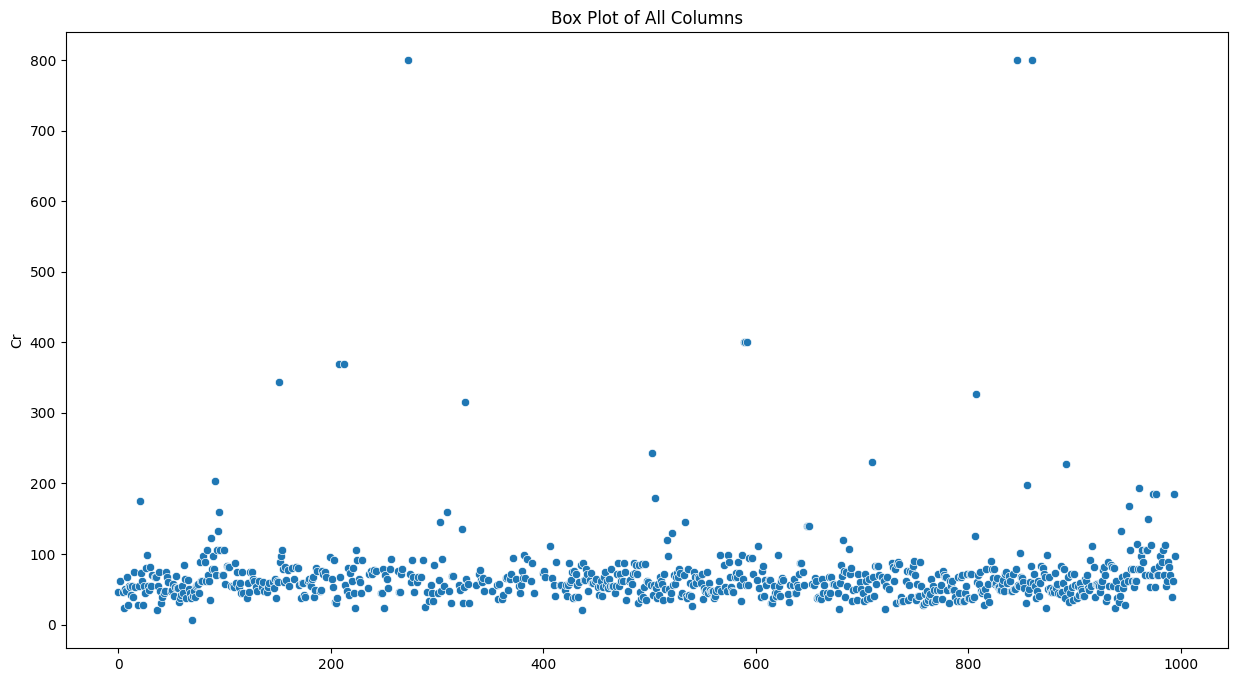

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot of All Columns")
plt.show()

In [18]:
data.shape

(826, 12)

In [19]:
from scipy.stats import zscore

def handle_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    for column in columns:
        z_scores = zscore(df_cleaned[column])  
        median = df_cleaned[column].median()
        df_cleaned[column] = np.where(
                np.abs(z_scores) > threshold, median, df_cleaned[column]
            )
    return df_cleaned

numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
data = handle_outliers_zscore(data, numerical_columns)
print("Original Data Shape:", data.shape)
print("After Replacing Outliers Shape:", data.shape)


Original Data Shape: (826, 12)
After Replacing Outliers Shape: (826, 12)


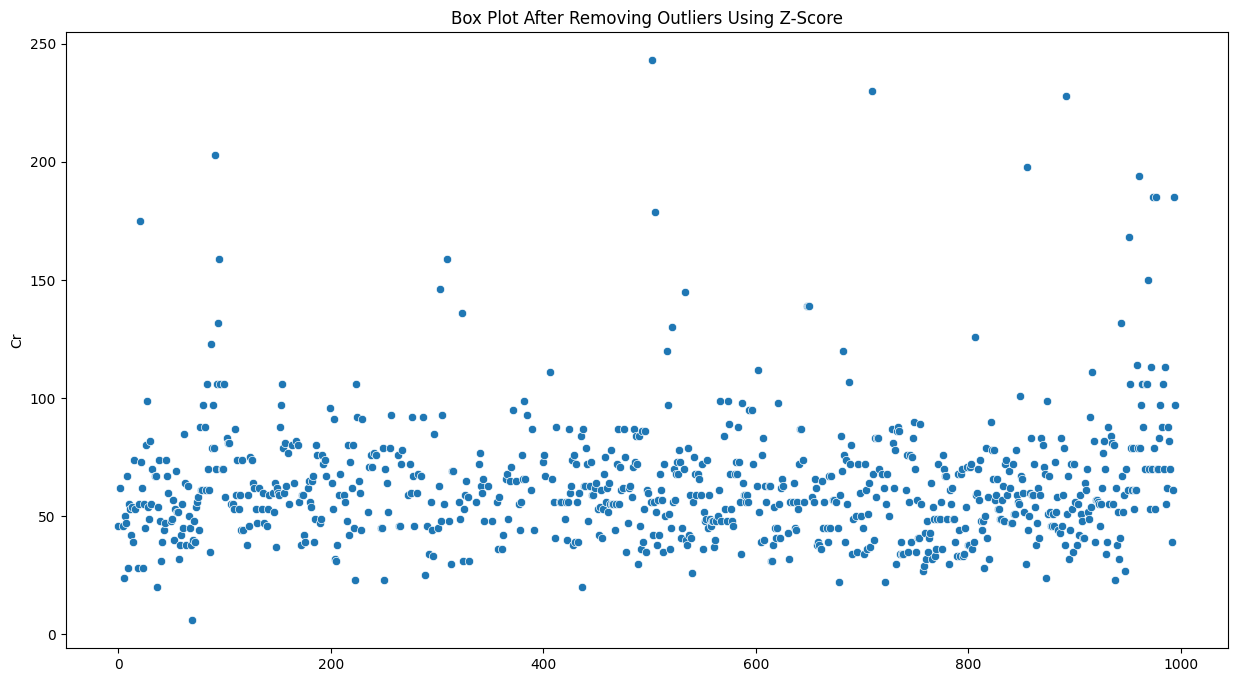

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot After Removing Outliers Using Z-Score")
plt.show()

In [21]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,55.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [24]:
data["CLASS"].value_counts()

CLASS
1    730
0     96
Name: count, dtype: int64

In [25]:
smote = SMOTE(random_state=42)
x=data.drop("CLASS",axis=1)
y=data["CLASS"]
x,y= smote.fit_resample(x,y)

In [26]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,55.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55.0,3.1,39.0,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28.0,3.5,61.0,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69.0,10.3,185.0,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1


In [27]:
data=pd.DataFrame(x,columns=datacpy.columns[2:-1])

In [28]:
data["CLASS"]=y

In [29]:
data.shape

(1460, 12)

In [30]:
data.drop_duplicates(inplace=True)
data.shape

(1455, 12)

In [31]:
data["CLASS"].value_counts()

CLASS
1    730
0    725
Name: count, dtype: int64

In [26]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
feat=sx.fit_transform(data.drop(["CLASS"],axis=1))
tar=sy.fit_transform(data["CLASS"].values.reshape(-1, 1))

In [27]:
data=pd.DataFrame(feat,columns=data.columns[:-1])

In [28]:
data["CLASS"]=tar

In [29]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.0,0.431373,0.308824,0.168776,0.264901,0.394737,0.093750,0.733333,0.196429,0.033058,0.206186,0.0
1,1.0,0.529412,0.294118,0.236287,0.264901,0.328947,0.171875,0.300000,0.321429,0.041322,0.164948,0.0
2,1.0,0.098039,0.485294,0.168776,0.264901,0.486842,0.109375,0.200000,0.303571,0.024793,0.082474,0.0


In [30]:
cm=data.corr()
cm

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
Gender,1.000000,0.253728,0.180406,0.217374,0.305974,0.077099,0.195486,-0.132835,0.006785,0.191297,0.339450,0.436786
AGE,0.253728,1.000000,0.247577,0.143380,0.497978,0.136968,0.257046,-0.013325,-0.031904,0.069482,0.520904,0.540168
Urea,0.180406,0.247577,1.000000,0.588413,0.081562,0.089295,0.167146,-0.017982,-0.001950,0.040032,0.123027,0.144146
Cr,0.217374,0.143380,0.588413,1.000000,-0.036856,-0.008616,0.109738,0.011314,0.026421,0.083119,-0.001008,0.022005
HbA1c,0.305974,0.497978,0.081562,-0.036856,1.000000,0.318168,0.328324,-0.050455,-0.019556,0.209612,0.696685,0.774447
Chol,0.077099,0.136968,0.089295,-0.008616,0.318168,1.000000,0.363153,0.043013,0.418757,0.168399,0.215839,0.333150
TG,0.195486,0.257046,0.167146,0.109738,0.328324,0.363153,1.000000,-0.124871,0.090266,0.190826,0.299178,0.389374
HDL,-0.132835,-0.013325,-0.017982,0.011314,-0.050455,0.043013,-0.124871,1.000000,-0.186003,-0.035376,-0.010760,-0.053805
LDL,0.006785,-0.031904,-0.001950,0.026421,-0.019556,0.418757,0.090266,-0.186003,1.000000,0.068359,-0.061034,0.001740
VLDL,0.191297,0.069482,0.040032,0.083119,0.209612,0.168399,0.190826,-0.035376,0.068359,1.000000,0.230597,0.230459


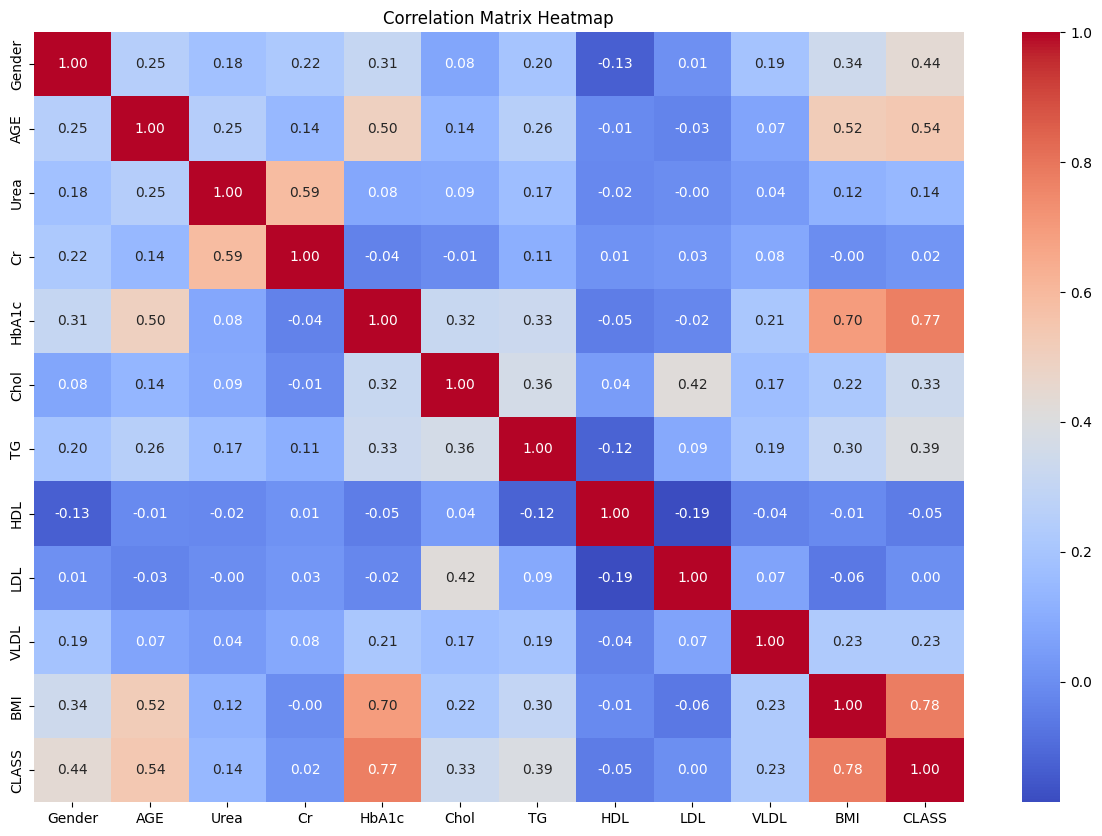

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()